# Exercise 1 - American Airlines Employees

1) read the data and import them in a data.frame or tibble structure
2) merge the four data tibble in a common tibble
3) produce a plot of the behaviour of the employees as a function of time for all four companies,
separately for the number of full-time and part-time employees
4) when did each company reach the minimum and maximum number of employess ?
5) plot the fraction of part-time worker over the total employess as a function of time
6) did the COVID-19 pandemic have any influence in the employed workers of the airline companies

? Can you see a trend in the years 2019-2023 ?

#### 1.
Read the data and import them in a data.frame or tibble structure


In [2]:
library(dplyr)
library(ggplot2)
library(data.table)
library(patchwork)

In [3]:
df1 <- read.table( 'american_airline_empl.txt', header = T )   #the read.table() function reads data from a local file and creates a data.frame
df2 <- read.table( 'delta_airline_empl.txt' , header = T )  
df3 <- read.table( 'federal_express_empl.txt' , header = T )  
df4 <- read.table( 'united_airline_empl.txt', header = T )  

# create and add a column to each dataframe, specifing the name of the company
temp1 = c("american_airline")
col1<-rep(temp1,  each=nrow(df1))
df1$company = col1

temp2 = c("delta_airline")
col2<-rep(temp2,  each=nrow(df2))
df2$company = col2

temp3 = c("federal_airline")
col3<-rep(temp3,  each=nrow(df3))
df3$company = col3

temp4 = c("united_airline")
col4<-rep(temp4,  each=nrow(df4))
df4$company = col4

#### 2.
Merge the four data tibble in a common tibble


In [4]:
#merge the 4 dataframe previously created
df_merged <- rbind(df1,df2,df3,df4)

#verify the type of variable we are dealing with: integers
typeof(df_merged$Full.time)

#make the required conversions
df_merged2 <- df_merged %>% mutate(Year = as.integer(Year))  

# remove commas from Full.time, Part.time and Grand_Total columns
df_merged2$Full.time <- as.numeric(gsub(",", "", df_merged2$Full.time))
df_merged2$Part.time <- as.numeric(gsub(",", "", df_merged2$Part.time))
df_merged2$Grand_Total <- as.numeric(gsub(",", "", df_merged2$Grand_Total))

df_merged2

[1] "integer"

Month,Year,Full.time,Part.time,Grand_Total,company
1,1990,68137,9039,77176,american_airline
2,1990,68725,9273,77998,american_airline
3,1990,69509,9376,78885,american_airline
4,1990,69713,9326,79039,american_airline
5,1990,70376,9309,79685,american_airline
6,1990,71258,9369,80627,american_airline
7,1990,72018,9651,81669,american_airline
8,1990,72513,9694,82207,american_airline
9,1990,72776,9788,82564,american_airline
10,1990,73111,9737,82848,american_airline


#### 3.
Produce a plot of the behaviour of the employees as a function of time for all four companies,


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.

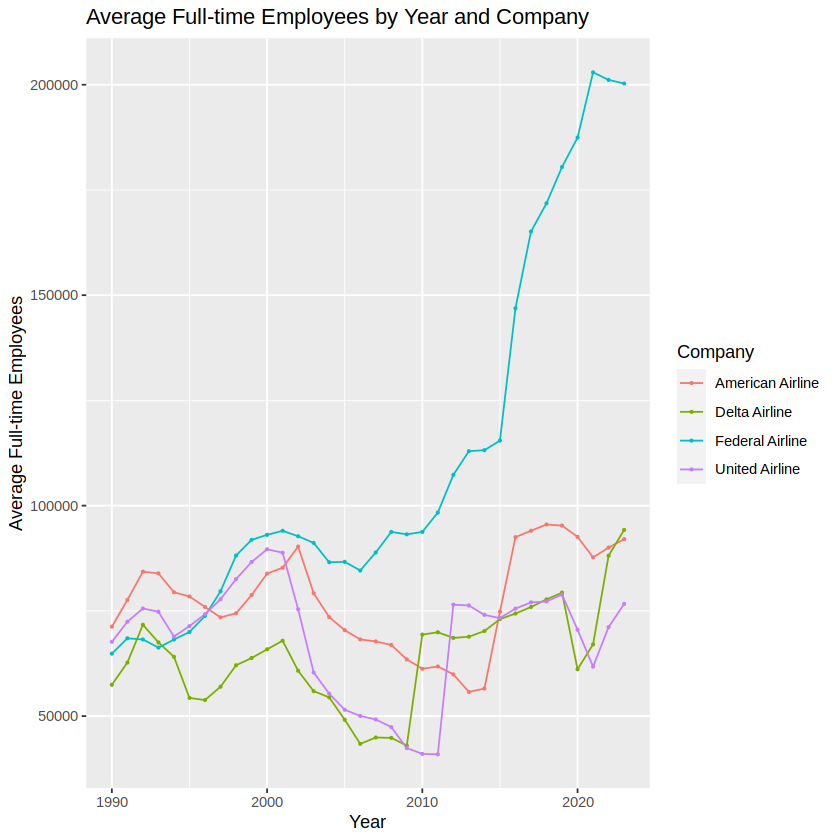

In [6]:
#extract the data to be plotted: Total Fulltime employee per year
  df_fulltime <- df_merged2 %>% 
  group_by(Year,company) %>% 
  summarize(Average_Fulltime_in_a_year= mean(Full.time))

# create plot
ggplot(df_fulltime, aes(x = Year, y = Average_Fulltime_in_a_year,  group = company, color = company)) +
geom_line() +
geom_point(size=0.5) +
labs(title = "Average Full-time Employees by Year and Company", x = "Year", y = "Average Full-time Employees")+
scale_color_discrete(name = "Company", labels = c("American Airline", "Delta Airline", "Federal Airline", "United Airline"))


`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.

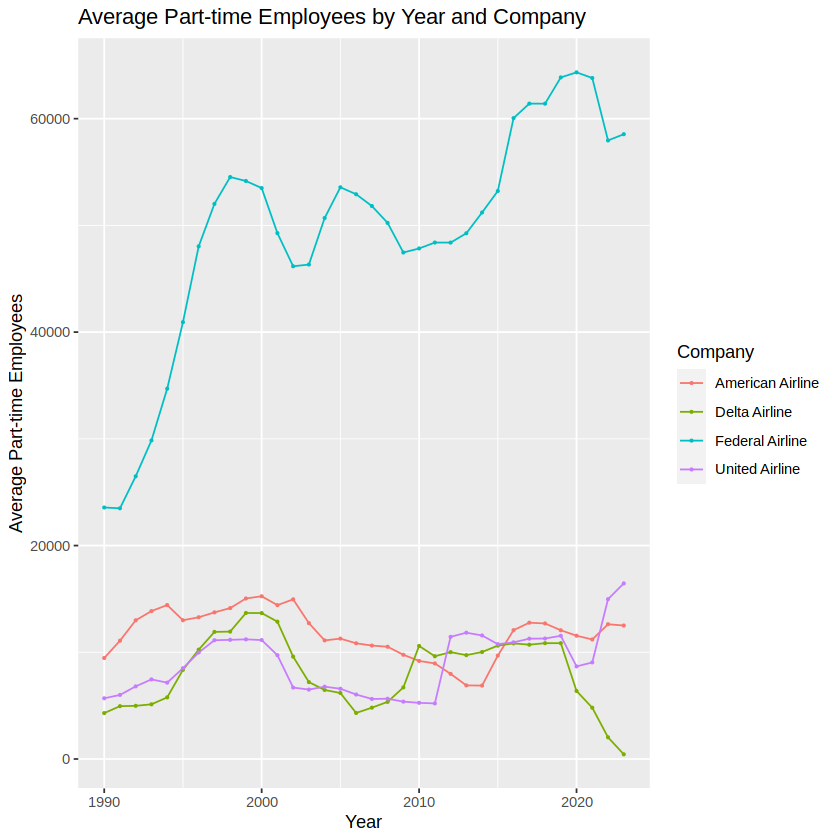

In [13]:
#extract the data to be plotted: Total Part time employee per year
  df_parttime <- df_merged2 %>% 
  group_by(Year,company) %>% 
  summarize(Average_Parttime_in_a_year= mean(Part.time))

# create plot
ggplot(df_parttime, aes(x = Year, y = Average_Parttime_in_a_year,  group = company, color = company)) +
geom_line() +
geom_point(size=0.5) +
labs(title = "Average Part-time Employees by Year and Company", x = "Year", y = "Average Part-time Employees")+
scale_color_discrete(name = "Company", labels = c("American Airline", "Delta Airline", "Federal Airline", "United Airline"))


#### 4.
When did each company reach the minimum and maximum number of employess ?


In [16]:
#group by year and sum all the total employee per year for each company
df_fulltimeA <- df_merged2 %>% 
  filter(company == "american_airline" ) %>% 
  group_by(Year,company) %>% 
  summarize(Total_employee_in_a_year = mean(Grand_Total))

df_fulltimeD <- df_merged2 %>% 
  filter(company == "delta_airline" ) %>% 
  group_by(Year,company) %>% 
  summarize(Total_employee_in_a_year = mean(Grand_Total))

df_fulltimeF <- df_merged2 %>% 
  filter(company == "federal_airline" ) %>% 
  group_by(Year,company) %>% 
  summarize(Total_employee_in_a_year = mean(Grand_Total))

df_fulltimeU <- df_merged2 %>% 
  filter(company == "united_airline" ) %>% 
  group_by(Year,company) %>% 
  summarize(Total_employee_in_a_year = mean(Grand_Total))


# create list of dataframes
list_of_dfs <- list(df_fulltimeA, df_fulltimeD, df_fulltimeF, df_fulltimeU)

# create empty vector to store max years
max_years <- c()
min_years <- c()

# loop through dataframes and find max year for each
for (df in list_of_dfs) {
  max_years <- c(max_years, df$Year[which.max(df$Total_employee_in_a_year)])
  min_years <- c(min_years, df$Year[which.min(df$Total_employee_in_a_year)])
}

# print max years
cat('when did each company reach the maximum number of employees ? \n')
cat('American--Delta--Federal--United:')
print(max_years)

cat('when did each company reach the minumum number of employees ? \n')
cat('American--Delta--Federal--United:')
print(min_years)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.

when did each company reach the maximum number of employees ? 
American--Delta--Federal--United:[1] 2018 2023 2021 2000
when did each company reach the minumum number of employees ? 
American--Delta--Federal--United:[1] 2013 2006 1990 2011


#### 5. 
Plot the fraction of part-time worker over the total employes as a function of time

Saving 6.67 x 6.67 in image

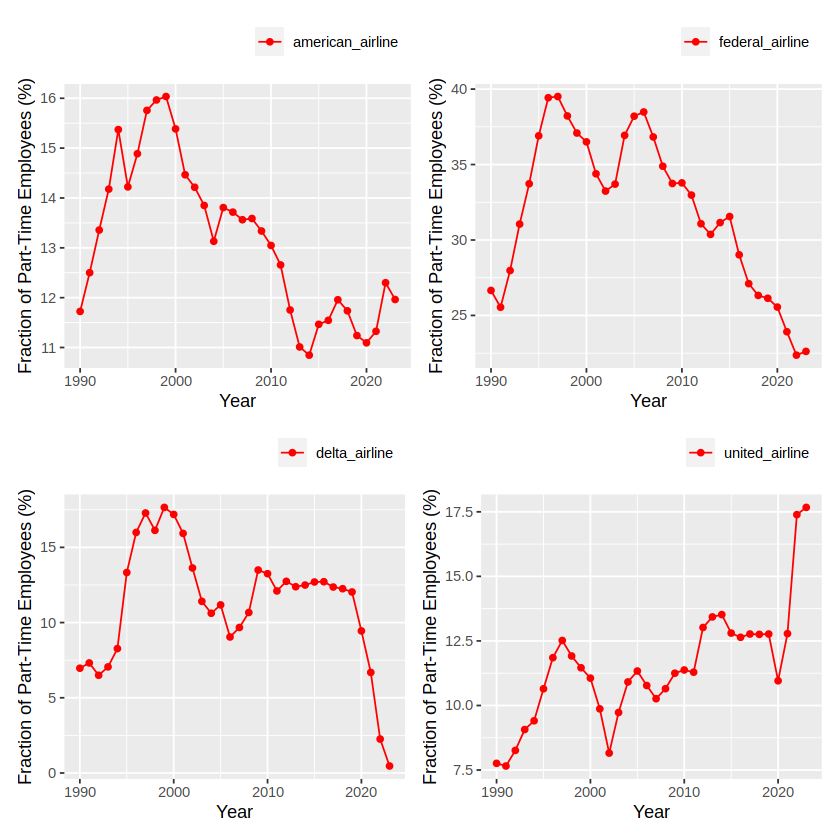

In [86]:
list_of_companies <- list("american_airline", "federal_airline", "delta_airline", "united_airline")    

plots <- list() # Create an empty list to store the plots

for (Company in list_of_companies) { #for loop over all the companies
    df_merged3<-copy(df_merged2)  #define a copy of the merged dataframe to work on
    df_merged3 <- df_merged3 %>%  filter(company == Company ) # select the airline company
    df_merged3$tot_employee <- df_merged3$Part.time + df_merged3$Full.time
    df_merged3 <- df_merged3 %>% group_by(Year) %>%  summarize(tot_employee=mean(tot_employee), Part.time=mean(Part.time))
    df_merged3$frac_part_time <- 100*(df_merged3$Part.time) / df_merged3$tot_employee #compute the fraction of part time
    df_merged3 <- df_merged3 %>% select('Year','frac_part_time') #select only the 'Year' and 'fraction of part time' columns 

    p <- ggplot(df_merged3, aes( x = Year , y = frac_part_time, colour = "red", label = Company )) +
        geom_line() +
        geom_point() +
        scale_color_manual(values = "red", labels = c(Company)) +     
        theme(legend.text = element_text(angle = 0))+
        theme(legend.position = "top", legend.justification = "right")+
        labs(x = "Year", y = "Fraction of Part-Time Employees (%)", color = "") 
        theme(plot.width = unit(5, "inch"), plot.height = unit(5, "inch"))  # set plot sizw
    plots[[Company]] <- p  # Add the plot to the list
}

# Create a 2x2 grid of plots using the patchwork package
combined_plots1 <- (plots[[1]] + plots[[2]]) / (plots[[3]] + plots[[4]])
combined_plots1

#saving to pdf
ggsave("E1.1.5.pdf", combined_plots1)

#### 6.
Did the COVID-19 pandemic have any influence in the employed workers of the airline companies?

Saving 6.67 x 6.67 in image

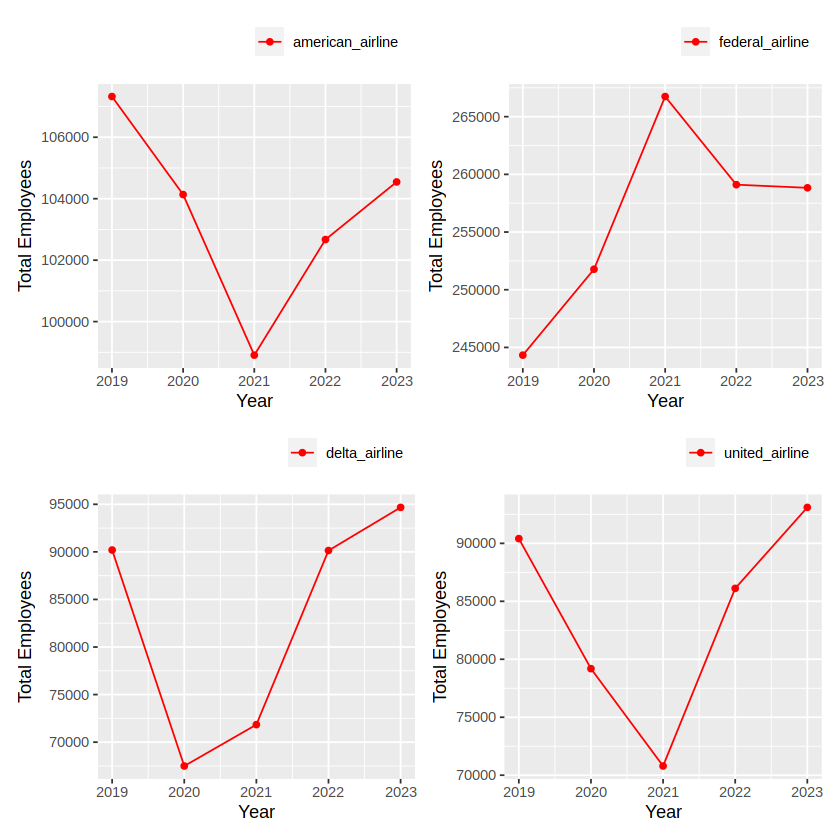

In [8]:
#plot only the grand total, in function of the year to see if covid influenced these workers

plots <- list() # Create an empty list to store the plots
list_of_companies <- list("american_airline", "federal_airline", "delta_airline", "united_airline")    

for (Company in list_of_companies) {
    df_merged4<-copy(df_merged2)  #define a copy of the merged dataframe to work on
    #df_merged4 <- subset(df_merged4,Year < 2022 ) #remove the last year (2023) for more readable data
    df_merged4 <- subset(df_merged4,Year > 2018 ) #from covid on
    df_merged4 <- df_merged4 %>%  filter(company == Company ) #at each iteration select one company
    df_merged4 <- df_merged4 %>% group_by(Year) %>%  summarize(Grand_Total=mean(Grand_Total)) #summarize the granf total, meaning it in a year
    df_merged4 <- df_merged4 %>% select('Year','Grand_Total') #select only the 'Year' and 'Grand_Total' columns 
    
    p <- ggplot(df_merged4, aes( x = Year , y = Grand_Total, colour = "red", label = Company )) +
        geom_line() +
        geom_point() +
        scale_color_manual(values = "red", labels = c(Company)) +
        labs(x = "Year", y = "Total Employees", color = "") +
        theme(legend.position = "top", legend.justification = "right")
        theme(plot.width = unit(3, "inch"), plot.height = unit(2, "inch"))  # set plot sizw
    plots[[Company]] <- p  # Add the plot to the list
}


# Create a 2x2 grid of plots using the patchwork package
combined_plots2 <- (plots[[1]] + plots[[2]]) / (plots[[3]] + plots[[4]])
combined_plots2

#saving the pdf
ggsave("E1.1.6.pdf", combined_plots2)

The data in the plot clearly indicates that, on average, all companies except for the federal airline had fewer total employees during the COVID pandemic. The negative trend is particularly pronounced in the year 2021.
This suggests that the pandemic has had a significant impact on employment levels across various industries.
There could be several reasons for this trend. For example, during the active phase of the pandemic most of the travel was forbidden in order to try to contain the spread of the virus. Additionally,  some companies may have experienced a decline in demand for their products or services due to reduced economic activity during the pandemic, leading to a reduction in their workforce.

On the other hand we observe a positive trend for the federal airline. There could be several reasons why the federal airline managed to maintain its total number of employees during the pandemic, for exemple it is possible that this company have a niche market or serves an essential function, such as transporting medical personnel or essential goods, which allowed it to remain operational and maintain its workforce.

# Exercise 2 - Data Frames and Tibble

1.1) Plot the total number of flights departed from each of the three NYC airports as a function of time
(one entry for each of the 365 days of the year).

1.2) Plot the average number of flights computed over the first five working days of each week as a
function of the week number of the year. Produce the same plot for the flights departing over the
weekend (Saturdays and Sundays).

2.1) For each flight in the data frame, compute the departure delay 1 and extract the following pieces of
information (separately for each NYC airport): min, max and average delay for each day of the year (show the data in corresponding plots)

3)Assuming the distance flew by the plane is, at first approximation, the distance between the two
connecting airports (as given in the data frame), compute the average speed of each plane. Produce
a plot of the average plane speed as a function of departure day of the year

4)analyze the flights offered by each airline company and determine:
- the airline companies offering the largest two numbers of flights per day and per week;
- the airline company offering the smallest number of flight per month;
- the airline company offering the longest distance flight per month.
(you can produce plots, if you like, to visualize the results of the analysis)

In [11]:
library(nycflights13)
library(data.table) #to use copy(·) function
library(dplyr)
library(ggplot2)
library(patchwork)
library(lubridate)
library(viridis)

#### 1.1
Plot the total number of flights departed from each of the three NYC airports as a function of time


Saving 6.67 x 6.67 in image

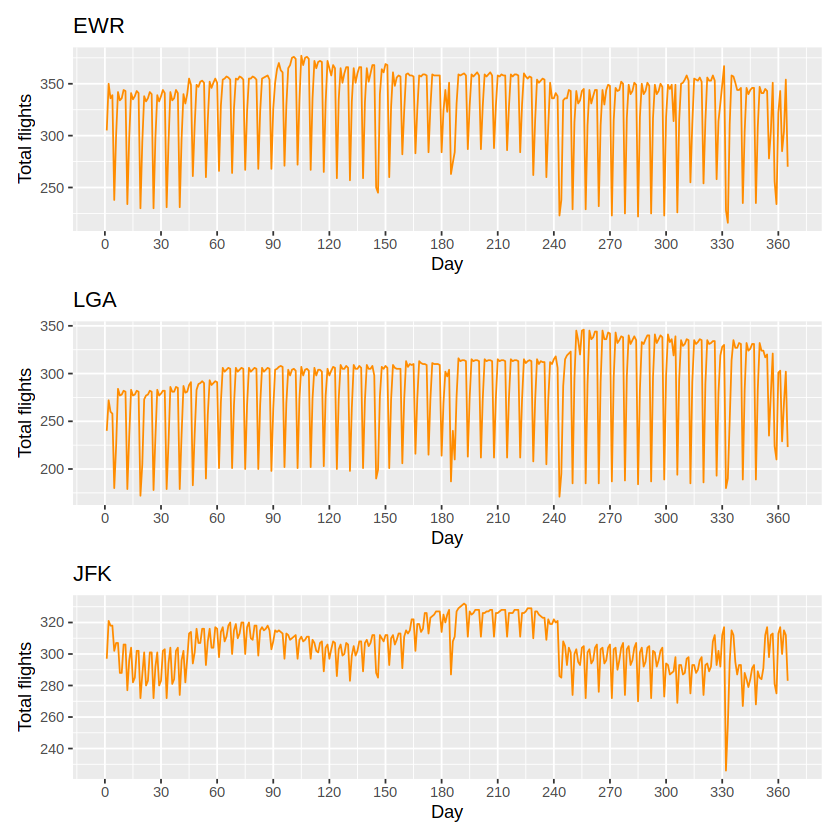

In [119]:
airports <- list('EWR','LGA','JFK') #create a list with the 3 NYC airports
plots <- list() # Create an empty list to store the plots

for (airport in airports) {
    df_1<-copy(flights)  #define a copy of the flight dataset 
    #df_1 <- df_1 %>% filter (!is.na( dep_delay), !is.na(arr_delay)) #delete the cancelled flights
    df_1 <- df_1 %>%  filter(origin == airport ) #select one of the 3 NYC airports
    df_1$date <- as.Date(paste(df_1$month, df_1$day, sep="-"), format="%m-%d") # Combine month and day columns into a single date column
    df_1$day_of_year <- yday(df_1$date) #Calculate the day of the year for each date
    df_1 <- df_1 %>% group_by(day_of_year) %>% summarise(total_count=n())# Group by count using dplyr    
    
    
    p <- ggplot(df_1, aes( x = day_of_year , y = total_count, colour = "red", label = origin )) +
        geom_line(color='darkorange') +
        scale_x_continuous(breaks = seq(0, 365, 30)) +  #plot xlabel ticks every 30
        scale_color_manual(values = "black", labels = c(origin)) +
        labs(x = "Day", y = "Total flights", title = airport, color = "")  
    plots[[airport]] <- p  # Add the plot to the list
}

# Create a grid of plots using the patchwork package
plot1 <- (plots[[1]]) /  (plots[[2]]) / (plots[[3]]) 
plot1

In [120]:
#check on the last plot for exemple (JFK)

# Calculate the mean of the total_count column values after group by process
total_mean <- mean(df_1$total_count)

#select one of the 3 NYC airports in the original dataset
df_JFK <- flights %>%  filter(origin == 'JFK')  

# View the result
cat("Check if the group by process worked well")
total_mean*365
nrow(df_JFK) 

# Check if x and y have the same value
all.equal(total_mean*365, nrow(df_JFK))

Check if the group by process worked well

[1] 111279

[1] 111279

[1] TRUE

#### 1.2
Plot the average number of flights computed over the first five working days of each week as a function of the week number of the year. Produce the same plot for the flights departing over the weekend (Saturdays and Sundays).

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”

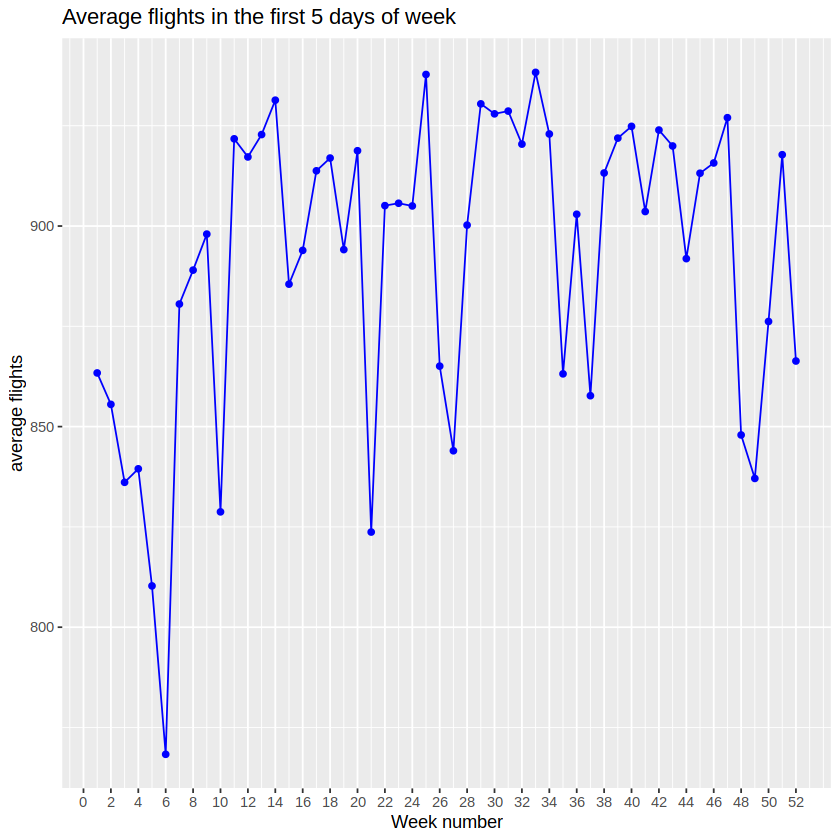

Saving 6.67 x 6.67 in imageSaving 6.67 x 6.67 in image

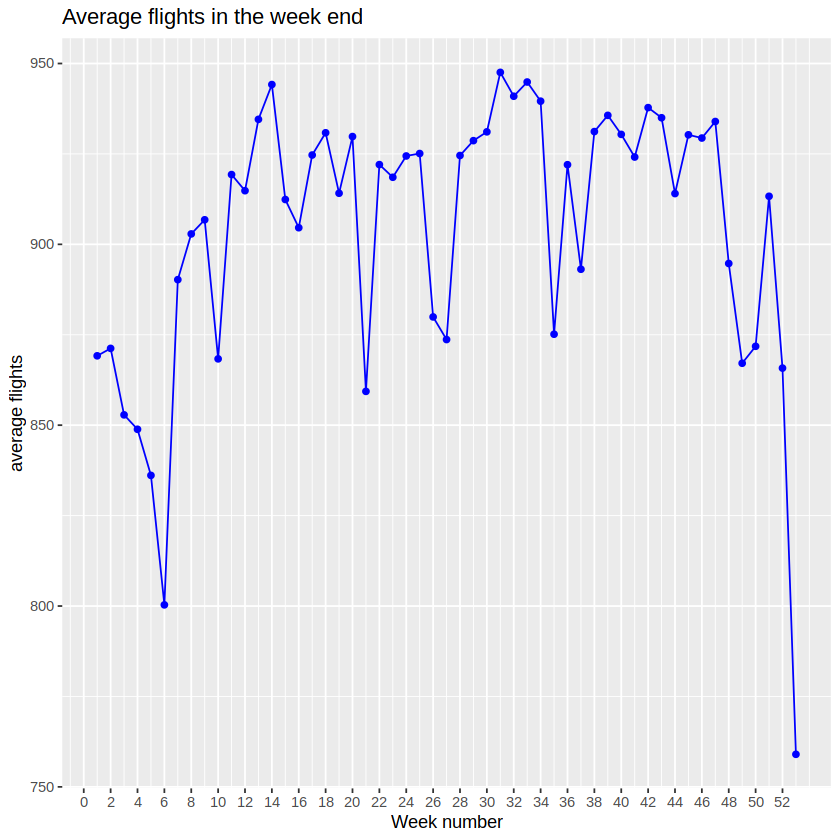

In [13]:
df_2<-copy(flights)  #define a copy of the flight dataset 
df_2 <- df_2 %>% filter (!is.na( dep_delay), !is.na(arr_delay)) #delete the cancelled flights

df_2$date <- as.Date(paste0(df_2$month, "-", df_2$day), format = "%m-%d")# Convert the month and day columns to a Date object
df_2$week <- week(df_2$date)# Extract the week number for each date using lubridate
df_2$day_of_year <- yday(df_2$date) #Calculate the day of the year for each date
df_3<-copy(df_2)  #parallel calculation for the weekend one 

#*** other days of the week***
df_2 <- df_2 %>%  filter(wday(date) %in% 2:6) #select the day of the week (NB the number returned for Sunday is 1, for Monday is 2)
df_2 <- df_2 %>% group_by(day_of_year) %>% summarise(week=week,total_count=n(), .groups = 'drop')# Group by day_of_year and count 
df_2 <- df_2 %>% group_by(week) %>% summarise(avg_flights_week=mean(total_count))# Group by number of the week and mean 

 plot2 <- ggplot(df_2, aes( x = week , y = avg_flights_week )) +
                geom_line(color='blue') +
                geom_point(color='blue') +
                scale_x_continuous(breaks = seq(0, 52, 2))+   #plot xlabel ticks every 30
                labs(x = "Week number", y= "average flights" ,title = "Average flights in the first 5 days of week", color = "")  
plot2

#*** Weekend***
df_3 <- df_3 %>%  filter(wday(date) %in% 7:1) #select the day of the week end
df_3 <- df_3 %>% group_by(day_of_year) %>% summarise(week=week,total_count=n(), .groups = 'drop')# Group by day of year and count 
df_3 <- df_3 %>% group_by(week) %>% summarise(avg_flights_week=mean(total_count))# Group by week and do the mean 

plot3 <- ggplot(df_3, aes( x = week , y = avg_flights_week )) +
            geom_line(color='blue') +
            geom_point(color='blue') +
            scale_x_continuous(breaks = seq(0, 52, 2))+   #plot xlabel ticks every 30
            labs(x = "Week number", y= "average flights" ,title = "Average flights in the week end", color = "")  
plot3

#saving the pdf
ggsave("E1.2.2a.pdf", plot2)
ggsave("E1.2.2b.pdf", plot3)

#### 2.1
For each flight in the data frame, compute the departure delay 1 and extract the following pieces of information (separately for each NYC airport): min, max and average delay for each day of the year (show the data in corresponding plots

##### N.B.
Note that in the following plots (in particular this is clear form the minimum delay graph) there are negative values which indicate negative delay and thus an advance; it has been decided, in fact, to consider even these values under the concept of 'delay'.

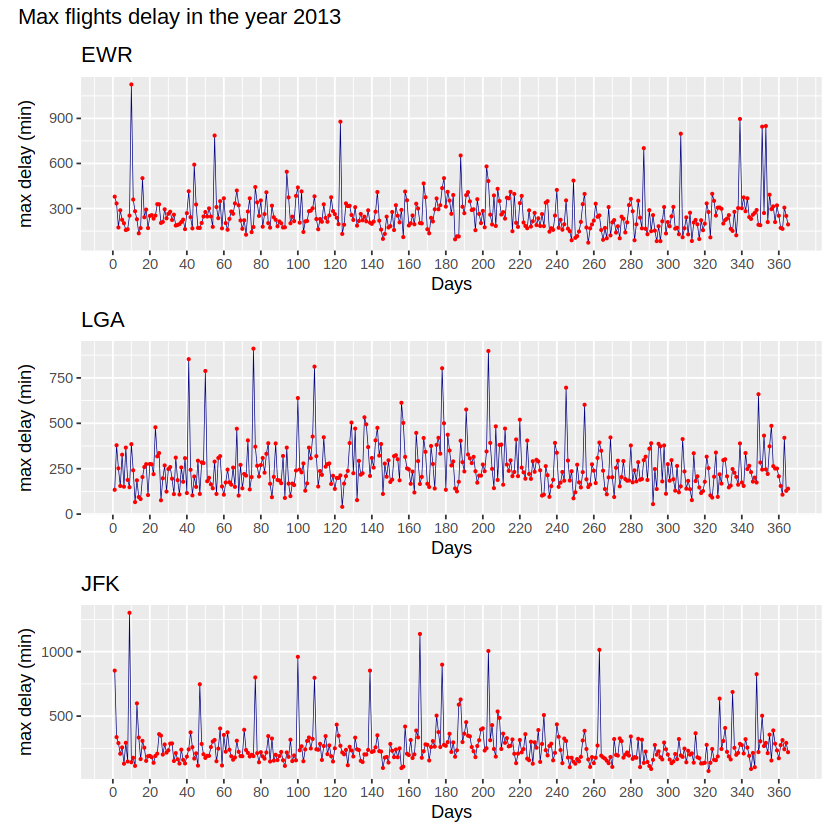

In [58]:
airports <- list('EWR','LGA','JFK') #create a list with the 3 NYC airports
plots_max <- list() # Create an empty list to store the plots
plots_min <- list() 
plots_avg <- list() 
value_avg_avg <- list() 

for (airport in airports) {
   
    df_4<-copy(flights)  #define a copy of the flight dataset 
    df_4 <- df_4 %>% filter (!is.na( dep_delay), !is.na(arr_delay)) #delete the cancelled flights ( very important this time!)
    df_4 <- df_4 %>%  filter(origin == airport ) #select one of the 3 NYC airports

    df_4$date <- as.Date(paste(df_4$month, df_4$day, sep="-"), format="%m-%d") # Combine month and day columns into a single date column
    df_4$day_of_year <- yday(df_4$date) #Calculate the day of the year for each date
    df_4 <- df_4 %>% group_by(day_of_year) %>% summarise(dep_delay_max=max(dep_delay), dep_delay_min=min(dep_delay), dep_delay_avg=mean(dep_delay)) # Group by max, min, avg, using dplyr

    # Compute mean of departure delays for dep_delay_avg and save it
    mean_dep_delay <- mean(df_4$dep_delay_avg)
    value_avg_avg[[airport]] <-mean_dep_delay

    #plot of the max
    p_max <- ggplot(df_4, aes( x = day_of_year , y = dep_delay_max )) +
            geom_line(color='navy', linewidth=0.2) +
            geom_point(color='red', size=0.5) +
            scale_x_continuous(breaks = seq(0, 365, 20))+   #plot xlabel ticks every 30
            labs(x = "Days", y= "max delay (min)" ,title = airport, color = "") 
    plots_max[[airport]] <- p_max  # Add the plot to the list
    
    #plot of the min
    p_min <- ggplot(df_4, aes( x = day_of_year , y = dep_delay_min )) +
            geom_line(color='navy', linewidth=0.2) +
            geom_point(color='darkgreen', size=0.5) +
            scale_x_continuous(breaks = seq(0, 365, 20))+   #plot xlabel ticks every 30
            labs(x = "Days", y= "min delay (min)" ,title = airport, color = "")  #Min flights delay in the year 2013
    plots_min[[airport]] <- p_min  # Add the plot to the list
    
    #plot of the average
    p_avg <- ggplot(df_4, aes( x = day_of_year , y = dep_delay_avg )) +
            geom_line(color='navy', linewidth=0.2) +
            geom_point(color='orange', size=0.5) +
            geom_hline(yintercept = mean_dep_delay, linetype = "dashed",linewidth = 0.2)+ #mean line
            scale_x_continuous(breaks = seq(0, 365, 20))+   #plot xlabel ticks every 30
            labs(x = "Days", y= "average delay (min)" ,title = airport, color = "")  #Avg flights delay in the year 2013
    plots_avg[[airport]] <- p_avg  # Add the plot to the list
}

patchwork <- (plots_max[[1]]) /  (plots_max[[2]]) / (plots_max[[3]]) # Create a grid of plots using the patchwork package
patchwork + plot_annotation(
  title = 'Max flights delay in the year 2013',
)

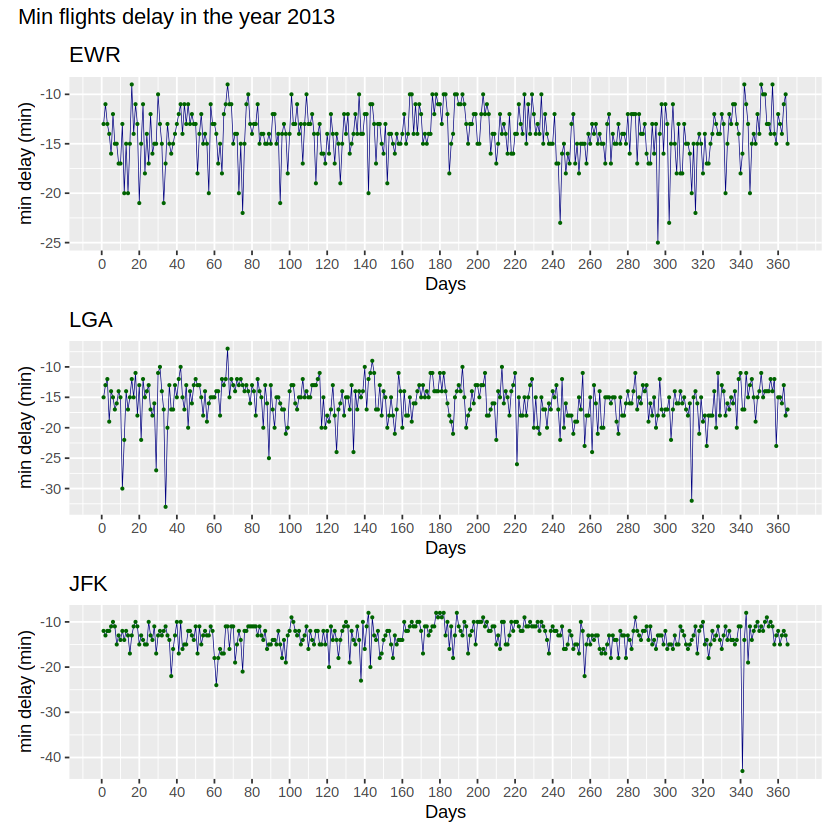

In [56]:
patchwork <-(plots_min[[1]]) /  (plots_min[[2]]) / (plots_min[[3]]) 
patchwork + plot_annotation(
  title = 'Min flights delay in the year 2013',
)

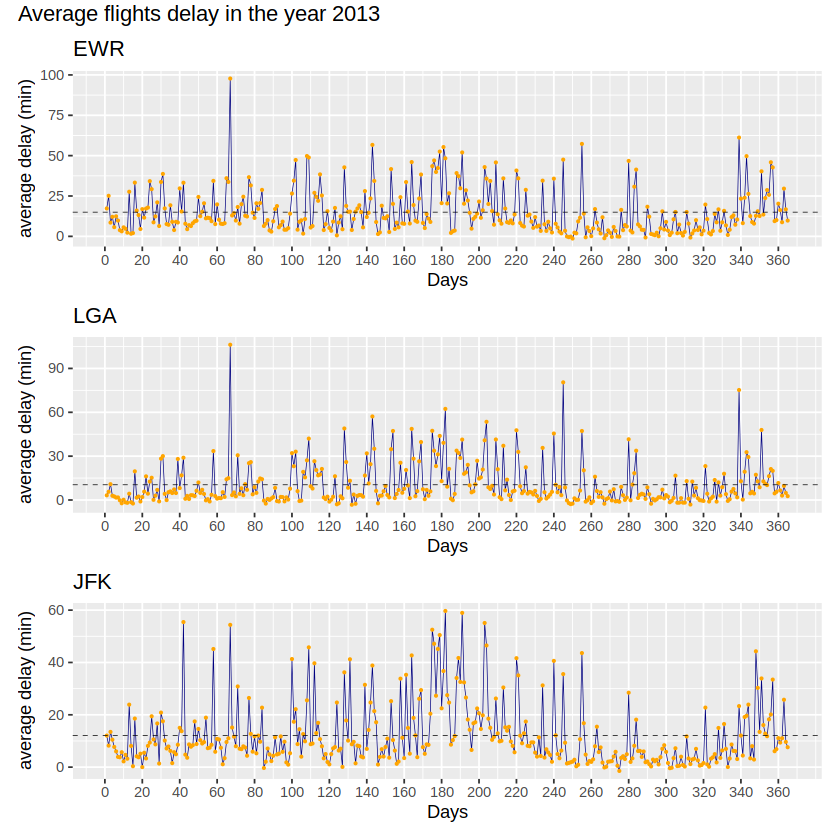

In [59]:
patchwork <- (plots_avg[[1]]) /  (plots_avg[[2]]) / (plots_avg[[3]]) 
patchwork + plot_annotation( title = 'Average flights delay in the year 2013',) 

#### 3.
Assuming the distance flew by the plane is, at first approximation, the distance between the two
connecting airports (as given in the data frame), compute the average speed of each plane. Produce
a plot of the average plane speed as a function of departure day of the year

In [39]:
df_5 <- copy(flights)  #define a copy of the flight dataset 
df_5 <- df_5 %>% filter (!is.na(dep_delay), !is.na(arr_delay)) #delete the cancelled flights ( very important this time!)
df_5$air_time <- df_5$air_time/100 #divide by 100 to split by a '.' the first two digits (hours) and the last two (mins)
df_5$air_time_hm <- hm(as.numeric(gsub("\ .", "-",  df_5$air_time))) #sobsitute the '.' with a '-'
                                                                                                                                    #convert in %H %M format with LUBRIDATE'S hm
df_5$air_time_h <- hour(df_5$air_time_hm) + minute(df_5$air_time_hm)/60  #convert all in hours
df_5$velocity_kmh <- df_5$distance / df_5$air_time_h #compute velocity

#check if the conversion processes worked well
test_df<- select(df_5,air_time, air_time_h, velocity_kmh)
cat("Check if the conversion of the air_time column in hours worked well:")
test_df

df_5$time_hour <-  yday(df_5$time_hour) #convert 'time_hour' into days form 1 to 365

df_5 <- df_5 %>% group_by(time_hour)  %>% summarise(velocity_kmh=mean(velocity_kmh))

Check if the conversion of the air_time column in hours worked well:

air_time,air_time_h,velocity_kmh
2.27,2.4500000,571.4286
2.27,2.4500000,577.9592
1.60,2.0000000,544.5000
1.83,2.3833333,661.2587
1.16,1.2666667,601.5789
1.50,1.8333333,392.1818
1.58,1.9666667,541.5254
0.53,0.8833333,259.2453
1.40,1.6666667,566.4000
1.38,1.6333333,448.7755


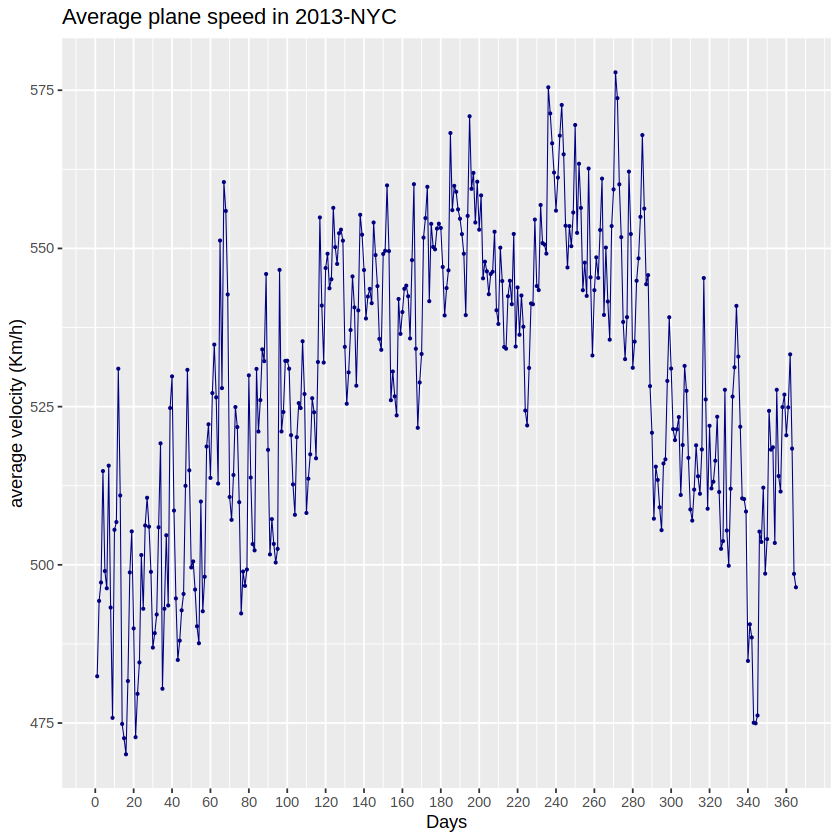

In [34]:
ggplot(df_5, aes( x = time_hour , y = velocity_kmh )) +
        geom_line(color='navy', linewidth=0.3) +
        geom_point(color='navy', size=0.5) +
        scale_x_continuous(breaks = seq(0, 365, 20))+   #plot xlabel ticks every 30
        labs(x = "Days", y= "average velocity (Km/h)" ,title = 'Average plane speed in 2013-NYC', color = "")  #Avg flights delay in the year 2013

#### 4.
Analyze the flights offered by each airline company and determine:
- the airline companies offering the largest two numbers of flights per day and per week;
- the airline company offering the smallest number of flight per month;
- the airline company offering the longest distance flight per month.
(you can produce plots, if you like, to visualize the results of the analysis)

In [51]:
# the airline companies offering the largest two numbers of flights per day and per week

#PER DAY
df_6a <- copy(flights)  #define a copy of the flight dataset 
df_6a <- df_6a %>% filter (!is.na(dep_delay), !is.na(arr_delay)) #delete cancelled flights 

df_6a$day_of_year <- yday(df_6a$time_hour) #Calculate day of the year
df_6a <- df_6a %>% group_by(day_of_year, origin) %>% summarise(total_count=n(), .groups = 'drop')# Group by count using dplyr
df_2_lrgest_cnts_a <- df_6a %>% group_by(day_of_year) %>% top_n(n = 2, wt = total_count) # filter(distance_max == max(distance_max)) %>% select(day_of_year, origin)
cat("The airline companies offering the largest two numbers of flights per day and per week are:")
df_2_lrgest_cnts_a

#PER WEEK 
df_6b <- copy(flights)  #define a copy of the flight dataset 
df_6b <- df_6b %>% filter (!is.na(dep_delay), !is.na(arr_delay)) #delete cancelled flights 

df_6b$day_of_year <- yday(df_6b$time_hour) #Calculate day of the year
df_6b$week <- week(df_6b$time_hour) #extract the week number

df_6b <- df_6b %>% group_by(week, origin) %>% summarise( total_count=n(), .groups = 'drop')# Group by count using dplyr
df_2_lrgest_cnts_b <- df_6b %>% group_by(week) %>% top_n(n = 2, wt = total_count) #select the top two companies which has the max total count 
df_2_lrgest_cnts_b

The airline companies offering the largest two numbers of flights per day and per week are:

day_of_year,origin,total_count
1,EWR,300
1,JFK,295
2,EWR,341
2,JFK,317
3,EWR,331
3,JFK,317
4,EWR,337
4,JFK,316
5,EWR,237
5,JFK,300


week,origin,total_count
1,EWR,2187
1,JFK,2157
2,EWR,2208
2,JFK,2043
3,EWR,2170
3,JFK,1997
4,EWR,2129
4,JFK,2008
5,EWR,2092
5,JFK,1991


In [68]:
# Count how many times each company was in the top two per day
#ave function is used to apply the rank function within each group (=company)
top_two_per_day <- subset(df_2_lrgest_cnts_a, ave(total_count, day_of_year, FUN = function(x) rank(-x, ties.method = "min")) <=2)
cat("How many times each company was in the top two per day of the year:")
table(top_two_per_day$origin)

#######*****************************************************########
                                                  
# Group data by week and origin, and calculate total count for each group
df_weekly <- aggregate(total_count ~ origin + week, data = df_2_lrgest_cnts_b, sum)

# Order data by week and total count
df_weekly <- df_weekly[order(df_weekly$week, -df_weekly$total_count),]

# Count how many times each company was in the top two per week
top_two_per_week <- subset(df_weekly, ave(total_count, week, FUN = function(x) rank(-x, ties.method = "min")) <= 2)
cat("How many times each company was in the top two per week:")
table(top_two_per_week$origin)

How many times each company was in the top two per day of the year:


EWR JFK LGA 
363 278  93 

How many times each company was in the top two per week:


EWR JFK LGA 
 53  39  14 

In [40]:
# the airline company offering the smallest number of flight per month

df_7 <- copy(flights)  #define a copy of the flight dataset 
df_7 <- df_7 %>% filter (!is.na(dep_delay), !is.na(arr_delay)) #delete cancelled flights 

df_7$day_of_year <- yday(df_7$time_hour) #Calculate day of the year
df_7 <- df_7 %>% group_by(month, origin) %>% summarise(total_count=n(), .groups = 'drop')# Group by count using dplyr

df_min_origin <- df_7 %>% group_by(month) %>%  filter(total_count == min(total_count)) %>% select(month, origin)
cat("The airline company offering the smallest number of flight per month are:")
df_min_origin

The airline company offering the smallest number of flight per month are:

month,origin
1,LGA
2,LGA
3,LGA
4,LGA
5,LGA
6,LGA
7,LGA
8,LGA
9,JFK
10,JFK


In [43]:
# the airline company offering the longest distance flight per month

df_8 <- copy(flights)  #define a copy of the flight dataset 
df_8 <- df_8 %>% filter (!is.na(dep_delay), !is.na(arr_delay)) #delete cancelled flights 

df_8 <- df_8 %>%  group_by(month,origin) %>%  summarize(distance_max = max(distance))
df_max_origin <- df_8 %>% group_by(month) %>%  filter(distance_max == max(distance_max)) %>% select(month, origin)
cat("The airline company offering the longest distance flight per month are:")
df_max_origin

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.

The airline company offering the longest distance flight per month are:

month,origin
1,JFK
2,JFK
3,JFK
4,JFK
5,JFK
6,JFK
7,JFK
8,JFK
9,JFK
10,JFK
